In [26]:
import os
import pandas as pd
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from itertools import combinations
import matplotlib.pyplot as plt

os.chdir('/home/lewis/PhD/compounds-research')
from compounds_research.compound import utils
from compounds_research import settings
from compounds_research.compound.fetch_exchange_rates import make_exchange_rate_df

In [19]:
tokens = []
for k in settings.COMPOUND_TOKEN_TRANSLATOR:
    tokens.append(settings.COMPOUND_TOKEN_TRANSLATOR[k])
print(tokens)

['eth', 'bat', 'zrx', 'usdc', 'dai', 'sai', 'rep', 'wbtc']


eth_bat       bat       eth  i_rate_diff  ex_rate_diff
2019-04-02   510.16  0.000093  0.000440    -0.000347         53.73
2019-04-03   563.89  0.001310  0.021422    -0.020113         -7.29
2019-04-04   556.60  0.001324  0.016186    -0.014862        -18.29
2019-04-05   538.31  0.001371  0.009285    -0.007914         67.13
2019-04-10   605.44  0.000812  0.008922    -0.008109          5.62
...             ...       ...       ...          ...           ...
2020-05-02  1120.30  0.002104  0.000093     0.002011         14.93
2020-05-03  1135.23  0.002000  0.000092     0.001908        -27.71
2020-05-04  1107.52  0.001342  0.000093     0.001249         -2.08
2020-05-05  1105.44  0.000637  0.000091     0.000546         10.52
2020-05-06  1115.96  0.000637  0.000091     0.000546         29.75

[393 rows x 5 columns]


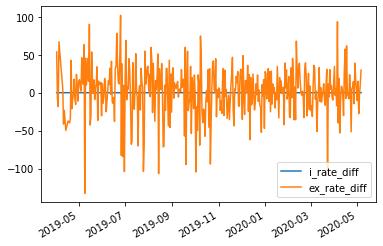

eth_zrx       zrx       eth  i_rate_diff  ex_rate_diff
2019-04-02   435.06  0.001218  0.000440     0.000778         71.24
2019-04-10   506.30  0.003992  0.008922    -0.004930         12.58
2019-04-11   518.88  0.003381  0.008615    -0.005234         -0.16
2019-04-14   518.72  0.003380  0.004804    -0.001424          4.48
2019-04-18   523.20  0.003031  0.003985    -0.000954          5.88
...             ...       ...       ...          ...           ...
2020-05-03  1016.37  0.001258  0.000092     0.001166         -3.76
2020-05-04  1012.61  0.001255  0.000093     0.001162        -17.42
2020-05-05   995.19  0.001245  0.000091     0.001155        -47.89
2020-05-06   947.30  0.001253  0.000091     0.001162       -241.98
2020-05-07   705.32  0.001307  0.000090     0.001218       -170.20

[390 rows x 5 columns]


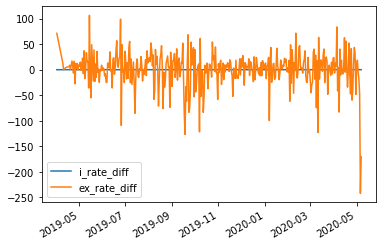

eth_usdc      usdc       eth  i_rate_diff  ex_rate_diff
2019-04-02    165.67  0.000000  0.000440    -0.000440         -4.53
2019-04-03    161.14  0.081503  0.021422     0.060081         -3.55
2019-04-04    157.59  0.112810  0.016186     0.096624          7.99
2019-04-05    165.58  0.077829  0.009285     0.068544          9.08
2019-04-10    174.66  0.091805  0.008922     0.082883        -10.29
...              ...       ...       ...          ...           ...
2020-05-03    210.01  0.009733  0.000092     0.009641         -3.13
2020-05-04    206.88  0.010300  0.000093     0.010207         -1.34
2020-05-05    205.54  0.011295  0.000091     0.011204         -6.51
2020-05-06    199.03  0.011776  0.000091     0.011685          4.71
2020-05-07    203.74  0.011776  0.000090     0.011686          7.63

[394 rows x 5 columns]


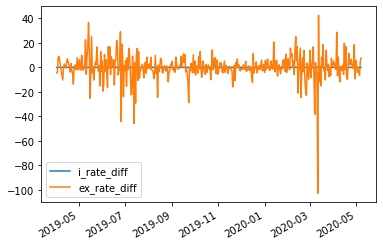

eth_dai       dai       eth  i_rate_diff  ex_rate_diff
2019-11-09   187.24  0.000000  0.000416    -0.000416         -0.35
2019-11-14   186.89  0.013110  0.000197     0.012913         -5.58
2019-11-15   181.31  0.017555  0.000168     0.017388          3.95
2019-11-16   185.26  0.022887  0.000164     0.022723         -1.57
2019-11-17   183.69  0.021554  0.000167     0.021387         -2.29
...             ...       ...       ...          ...           ...
2020-05-02   210.97  0.024181  0.000093     0.024088        -17.29
2020-05-03   193.68  0.007845  0.000092     0.007753         11.79
2020-05-04   205.47  0.007496  0.000093     0.007403          0.79
2020-05-05   206.26  0.006977  0.000091     0.006886        -10.14
2020-05-06   196.12  0.007140  0.000091     0.007048         18.45

[176 rows x 5 columns]


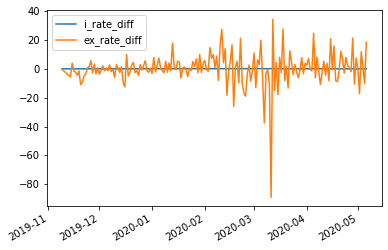

eth_sai       sai       eth  i_rate_diff  ex_rate_diff
2019-04-02   168.07  0.000000  0.000440    -0.000440         -3.90
2019-04-03   164.17  0.001883  0.021422    -0.019539         -1.67
2019-04-04   162.50  0.011904  0.016186    -0.004282          5.96
2019-04-05   168.46  0.020602  0.009285     0.011317         16.05
2019-04-10   184.51  0.026418  0.008922     0.017496         -8.65
...             ...       ...       ...          ...           ...
2020-05-03   128.57  0.029481  0.000092     0.029389          0.00
2020-05-04   128.57  0.029643  0.000093     0.029550          0.00
2020-05-05   128.57  0.030149  0.000091     0.030058          0.00
2020-05-06   128.57  0.030623  0.000091     0.030531          0.00
2020-05-07   128.57  0.030895  0.000090     0.030805          0.00

[398 rows x 5 columns]


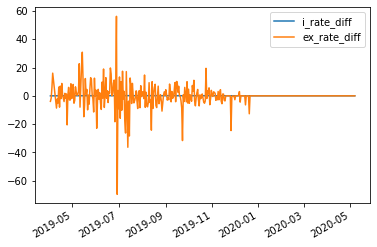

eth_rep       rep       eth  i_rate_diff  ex_rate_diff
2019-04-02    9.277  0.000000  0.000440    -0.000440        -1.212
2019-04-03    8.065  0.001731  0.021422    -0.019691         0.883
2019-04-10    8.948  0.001878  0.008922    -0.007043         0.118
2019-04-11    9.066  0.002300  0.008615    -0.006315        -0.596
2019-04-12    8.470  0.076684  0.001986     0.074698         0.253
...             ...       ...       ...          ...           ...
2020-05-03   19.370  0.000387  0.000092     0.000295        -0.240
2020-05-04   19.130  0.000384  0.000093     0.000291        -0.630
2020-05-05   18.500  0.000379  0.000091     0.000288        -0.100
2020-05-06   18.400  0.000378  0.000091     0.000287         0.500
2020-05-07   18.900  0.000379  0.000090     0.000289        -3.640

[393 rows x 5 columns]


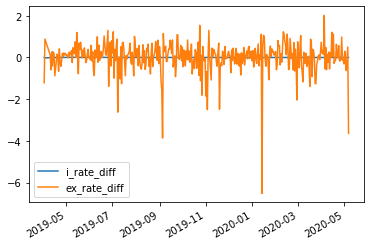

eth_wbtc      wbtc       eth  i_rate_diff  ex_rate_diff
2019-06-20   0.02979  0.004948  0.000124     0.004824       0.00573
2019-06-21   0.03552  0.000278  0.000159     0.000119      -0.00427
2019-06-22   0.03125  0.000362  0.000110     0.000252      -0.03125
2019-06-23   0.00000  0.000310  0.000091     0.000219       0.00000
2019-06-24   0.00000  0.000423  0.000098     0.000325       0.03322
...              ...       ...       ...          ...           ...
2020-05-03   0.00000  0.001188  0.000092     0.001097       0.00000
2020-05-04   0.00000  0.001206  0.000093     0.001113       0.00000
2020-05-05   0.00000  0.001247  0.000091     0.001156       0.00000
2020-05-06   0.00000  0.008420  0.000091     0.008329       0.02319
2020-05-07   0.02319  0.010527  0.000090     0.010438      -0.00214

[323 rows x 5 columns]


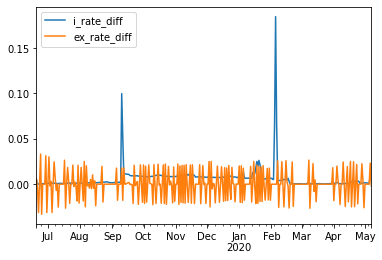

bat_zrx       zrx       bat  i_rate_diff  ex_rate_diff
2019-04-02   0.8528  0.001218  0.000093     0.001125       -0.0166
2019-04-10   0.8362  0.003992  0.000812     0.003179        0.0129
2019-04-11   0.8491  0.003381  0.000793     0.002588        0.1001
2019-04-14   0.9492  0.003380  0.105522    -0.102142        0.2018
2019-04-19   1.1510  0.004010  0.027008    -0.022997        0.1310
...             ...       ...       ...          ...           ...
2020-05-02   0.8907  0.001258  0.002104    -0.000846        0.0046
2020-05-03   0.8953  0.001258  0.002000    -0.000742        0.0190
2020-05-04   0.9143  0.001255  0.001342    -0.000087       -0.0140
2020-05-05   0.9003  0.001245  0.000637     0.000608       -0.0514
2020-05-06   0.8489  0.001253  0.000637     0.000616       -0.2333

[388 rows x 5 columns]


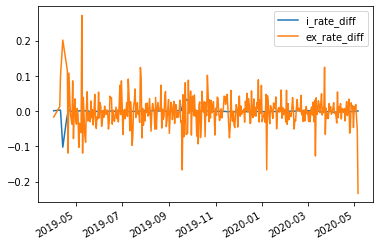

bat_usdc      usdc       bat  i_rate_diff  ex_rate_diff
2019-04-02    0.3232  0.000000  0.000093    -0.000093       -0.0374
2019-04-03    0.2858  0.081503  0.001310     0.080193       -0.0022
2019-04-04    0.2836  0.112810  0.001324     0.111486        0.0242
2019-04-05    0.3078  0.077829  0.001371     0.076458       -0.0051
2019-04-06    0.3027  0.054491  0.001319     0.053171       -0.0095
...              ...       ...       ...          ...           ...
2020-05-02    0.1915  0.007707  0.002104     0.005603       -0.0062
2020-05-03    0.1853  0.009733  0.002000     0.007733        0.0011
2020-05-04    0.1864  0.010300  0.001342     0.008958       -0.0002
2020-05-05    0.1862  0.011295  0.000637     0.010657       -0.0076
2020-05-06    0.1786  0.011776  0.000637     0.011139        0.0073

[393 rows x 5 columns]


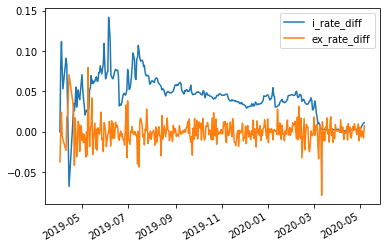

bat_dai       dai       bat  i_rate_diff  ex_rate_diff
2019-11-09   0.2463  0.000000  0.001935    -0.001935        0.0128
2019-11-14   0.2591  0.013110  0.001918     0.011193       -0.0081
2019-11-15   0.2510  0.017555  0.002762     0.014793        0.0176
2019-11-16   0.2686  0.022887  0.002800     0.020087        0.0097
2019-11-17   0.2783  0.021554  0.002812     0.018742       -0.0110
...             ...       ...       ...          ...           ...
2020-05-02   0.1883  0.024181  0.002104     0.022077       -0.0177
2020-05-03   0.1706  0.007845  0.002000     0.005845        0.0149
2020-05-04   0.1855  0.007496  0.001342     0.006154        0.0011
2020-05-05   0.1866  0.006977  0.000637     0.006339       -0.0109
2020-05-06   0.1757  0.007140  0.000637     0.006503        0.0116

[176 rows x 5 columns]


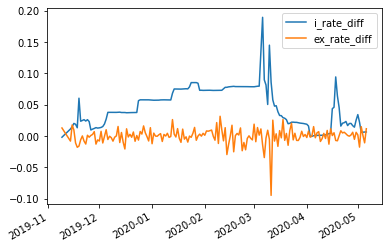

bat_sai       sai       bat  i_rate_diff  ex_rate_diff
2019-04-02   0.3294  0.000000  0.000093    -0.000093       -0.0374
2019-04-03   0.2920  0.001883  0.001310     0.000574        0.0000
2019-04-04   0.2920  0.011904  0.001324     0.010580        0.0192
2019-04-05   0.3112  0.020602  0.001371     0.019231        0.0013
2019-04-06   0.3125  0.028343  0.001319     0.027024       -0.0081
...             ...       ...       ...          ...           ...
2020-05-02   0.1733  0.029241  0.002104     0.027138       -0.0041
2020-05-03   0.1692  0.029481  0.002000     0.027481        0.0020
2020-05-04   0.1712  0.029643  0.001342     0.028301       -0.0036
2020-05-05   0.1676  0.030149  0.000637     0.029511       -0.0089
2020-05-06   0.1587  0.030623  0.000637     0.029986       -0.0078

[394 rows x 5 columns]


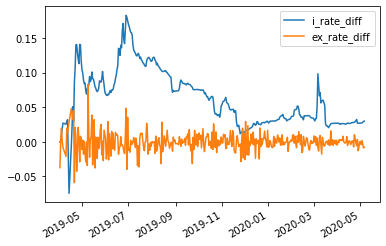

bat_rep       rep       bat  i_rate_diff  ex_rate_diff
2019-04-02  0.01818  0.000000  0.000093    -0.000093      -0.00388
2019-04-03  0.01430  0.001731  0.001310     0.000422       0.00048
2019-04-10  0.01478  0.001878  0.000812     0.001066       0.00006
2019-04-11  0.01484  0.002300  0.000793     0.001507       0.00003
2019-04-12  0.01487  0.076684  0.000792     0.075892       0.00034
...             ...       ...       ...          ...           ...
2020-05-02  0.01695  0.000386  0.002104    -0.001717       0.00004
2020-05-03  0.01699  0.000387  0.002000    -0.001613       0.00029
2020-05-04  0.01728  0.000384  0.001342    -0.000958      -0.00047
2020-05-05  0.01681  0.000379  0.000637    -0.000258      -0.00024
2020-05-06  0.01657  0.000378  0.000637    -0.000259      -0.00010

[389 rows x 5 columns]


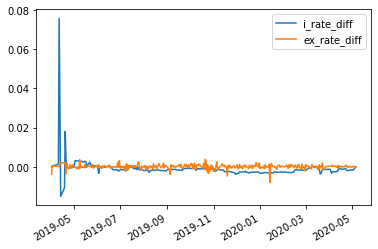

bat_wbtc      wbtc       bat  i_rate_diff  ex_rate_diff
2019-06-20  0.000036  0.004948  0.001245     0.003703      0.000003
2019-06-21  0.000039  0.000278  0.002132    -0.001854     -0.000006
2019-06-22  0.000033  0.000362  0.002110    -0.001748     -0.000033
2019-06-23  0.000000  0.000310  0.002100    -0.001790      0.000000
2019-06-24  0.000000  0.000423  0.002096    -0.001673      0.000033
...              ...       ...       ...          ...           ...
2020-05-02  0.000000  0.001453  0.002104    -0.000650      0.000000
2020-05-03  0.000000  0.001188  0.002000    -0.000811      0.000000
2020-05-04  0.000000  0.001206  0.001342    -0.000136      0.000000
2020-05-05  0.000000  0.001247  0.000637     0.000610      0.000000
2020-05-06  0.000000  0.008420  0.000637     0.007783      0.000020

[322 rows x 5 columns]


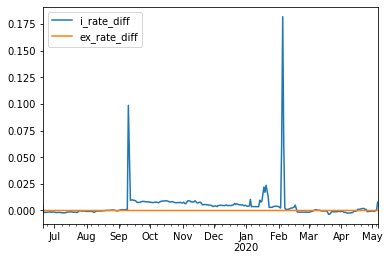

zrx_usdc      usdc       zrx  i_rate_diff  ex_rate_diff
2019-04-02    0.3794  0.000000  0.001218    -0.001218       -0.0285
2019-04-10    0.3509  0.091805  0.003992     0.087813       -0.0328
2019-04-11    0.3181  0.084856  0.003381     0.081475        0.0068
2019-04-14    0.3249  0.037809  0.003380     0.034429        0.0037
2019-04-19    0.3286  0.038861  0.004010     0.034851       -0.0054
...              ...       ...       ...          ...           ...
2020-05-03    0.2061  0.009733  0.001258     0.008475       -0.0012
2020-05-04    0.2049  0.010300  0.001255     0.009045        0.0012
2020-05-05    0.2061  0.011295  0.001245     0.010049        0.0042
2020-05-06    0.2103  0.011776  0.001253     0.010523        0.0786
2020-05-07    0.2889  0.011776  0.001307     0.010469        0.1061

[389 rows x 5 columns]


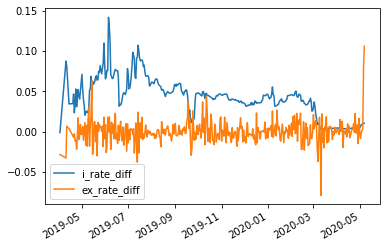

zrx_dai       dai       zrx  i_rate_diff  ex_rate_diff
2019-11-09   0.3038  0.000000  0.001308    -0.001308       -0.0112
2019-11-14   0.2926  0.013110  0.001270     0.011840       -0.0149
2019-11-15   0.2777  0.017555  0.001416     0.016140        0.0059
2019-11-16   0.2836  0.022887  0.001415     0.021472       -0.0041
2019-11-17   0.2795  0.021554  0.001347     0.020207       -0.0130
...             ...       ...       ...          ...           ...
2020-05-02   0.2114  0.024181  0.001258     0.022923       -0.0208
2020-05-03   0.1906  0.007845  0.001258     0.006587        0.0123
2020-05-04   0.2029  0.007496  0.001255     0.006241        0.0044
2020-05-05   0.2073  0.006977  0.001245     0.005731       -0.0003
2020-05-06   0.2070  0.007140  0.001253     0.005887        0.0972

[176 rows x 5 columns]


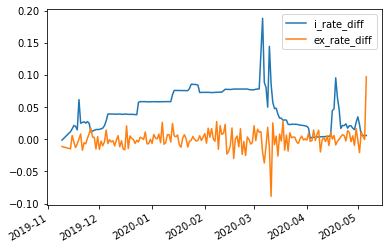

zrx_sai       sai       zrx  i_rate_diff  ex_rate_diff
2019-04-02   0.3863  0.000000  0.001218    -0.001218       -0.0213
2019-04-10   0.3650  0.026418  0.003992     0.022426       -0.0313
2019-04-11   0.3337  0.029952  0.003381     0.026572       -0.0002
2019-04-14   0.3335  0.030949  0.003380     0.027569        0.0136
2019-04-18   0.3471  0.028312  0.003031     0.025281       -0.0057
...             ...       ...       ...          ...           ...
2020-05-03   0.3502  0.029481  0.001258     0.028223        0.0000
2020-05-04   0.3502  0.029643  0.001255     0.028388        0.0000
2020-05-05   0.3502  0.030149  0.001245     0.028903        0.0000
2020-05-06   0.3502  0.030623  0.001253     0.029370        0.0000
2020-05-07   0.3502  0.030895  0.001307     0.029587        0.0000

[390 rows x 5 columns]


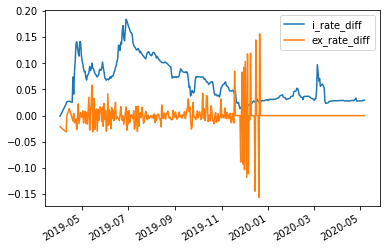

zrx_rep       rep       zrx  i_rate_diff  ex_rate_diff
2019-04-02  0.02132  0.000000  0.001218    -0.001218      -0.00365
2019-04-10  0.01767  0.001878  0.003992    -0.002113      -0.00020
2019-04-11  0.01747  0.002300  0.003381    -0.001081      -0.00144
2019-04-14  0.01603  0.090329  0.003380     0.086950      -0.00116
2019-04-19  0.01487  0.016097  0.004010     0.012086       0.00006
...             ...       ...       ...          ...           ...
2020-05-03  0.01897  0.000387  0.001258    -0.000871      -0.00005
2020-05-04  0.01892  0.000384  0.001255    -0.000871      -0.00032
2020-05-05  0.01860  0.000379  0.001245    -0.000867       0.00093
2020-05-06  0.01953  0.000378  0.001253    -0.000875       0.00731
2020-05-07  0.02684  0.000379  0.001307    -0.000929       0.00154

[388 rows x 5 columns]


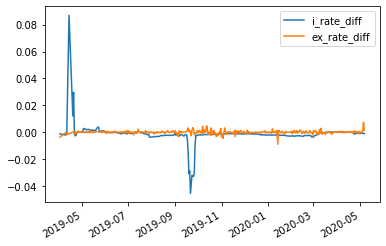

zrx_wbtc      wbtc       zrx  i_rate_diff  ex_rate_diff
2019-06-20    0.000036  0.004948  0.001583     0.003365      0.000004
2019-06-21    0.000040  0.000278  0.001844    -0.001567     -0.000005
2019-06-22    0.000035  0.000362  0.001721    -0.001359    286.999965
2019-06-23  287.000000  0.000310  0.001550    -0.001240     -8.000000
2019-06-24  279.000000  0.000423  0.001221    -0.000798   -278.999965
...                ...       ...       ...          ...           ...
2020-05-03  211.000000  0.001188  0.001258    -0.000069     -2.000000
2020-05-04  209.000000  0.001206  0.001255    -0.000049     -1.180000
2020-05-05  207.820000  0.001247  0.001245     0.000002      0.910000
2020-05-06  208.730000  0.008420  0.001253     0.007167   -208.729967
2020-05-07    0.000033  0.010527  0.001307     0.009220      0.000006

[323 rows x 5 columns]


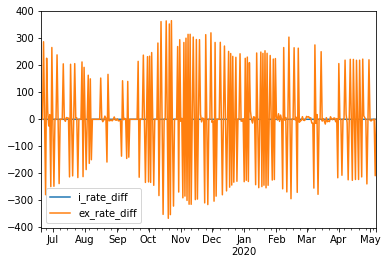

usdc_dai       dai      usdc  i_rate_diff  ex_rate_diff
2019-11-09    0.9970  0.000000  0.044070    -0.044070       -0.0020
2019-11-14    0.9950  0.013110  0.041683    -0.028573        0.0000
2019-11-15    0.9950  0.017555  0.041411    -0.023856       -0.0010
2019-11-16    0.9940  0.022887  0.041804    -0.018917        0.0020
2019-11-17    0.9960  0.021554  0.041442    -0.019888       -0.0020
...              ...       ...       ...          ...           ...
2020-05-02    0.9890  0.024181  0.007707     0.016474        0.0015
2020-05-03    0.9905  0.007845  0.009733    -0.001888        0.0025
2020-05-04    0.9930  0.007496  0.010300    -0.002804        0.0020
2020-05-05    0.9950  0.006977  0.011295    -0.004318       -0.0036
2020-05-06    0.9914  0.007140  0.011776    -0.004636        0.0041

[176 rows x 5 columns]


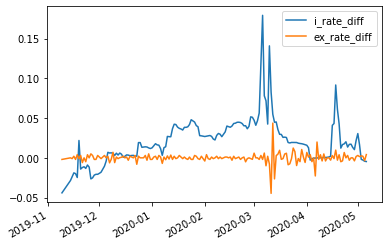

usdc_sai       sai      usdc  i_rate_diff  ex_rate_diff
2019-04-02     1.017  0.000000  0.000000     0.000000         0.008
2019-04-03     1.025  0.001883  0.081503    -0.079619         0.012
2019-04-04     1.037  0.011904  0.112810    -0.100906        -0.010
2019-04-05     1.027  0.020602  0.077829    -0.057227         0.003
2019-04-06     1.030  0.028343  0.054491    -0.026148         0.009
...              ...       ...       ...          ...           ...
2020-05-03     1.009  0.029481  0.009733     0.019748         0.000
2020-05-04     1.009  0.029643  0.010300     0.019344         0.000
2020-05-05     1.009  0.030149  0.011295     0.018854         0.000
2020-05-06     1.009  0.030623  0.011776     0.018847         0.000
2020-05-07     1.009  0.030895  0.011776     0.019118         0.000

[395 rows x 5 columns]


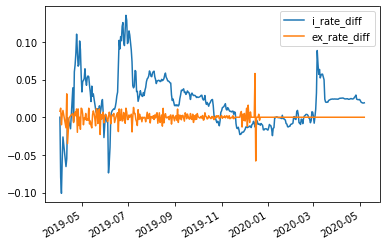

usdc_rep       rep      usdc  i_rate_diff  ex_rate_diff
2019-04-02   0.05626  0.000000  0.000000     0.000000      -0.00619
2019-04-03   0.05007  0.001731  0.081503    -0.079771       0.00116
2019-04-10   0.05123  0.001878  0.091805    -0.089926       0.00365
2019-04-11   0.05488  0.002300  0.084856    -0.082556      -0.00332
2019-04-12   0.05156  0.076684  0.033240     0.043444      -0.00209
...              ...       ...       ...          ...           ...
2020-05-03   0.09198  0.000387  0.009733    -0.009346       0.00050
2020-05-04   0.09248  0.000384  0.010300    -0.009915      -0.00235
2020-05-05   0.09013  0.000379  0.011295    -0.010916       0.00281
2020-05-06   0.09294  0.000378  0.011776    -0.011398      -0.00384
2020-05-07   0.08910  0.000379  0.011776    -0.011398      -0.01735

[391 rows x 5 columns]


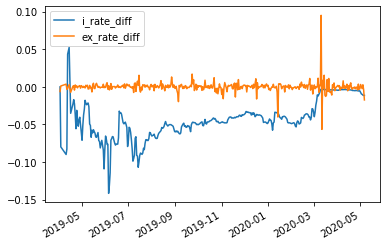

usdc_wbtc      wbtc      usdc  i_rate_diff  ex_rate_diff
2019-06-20   0.000110  0.004948  0.035674    -0.030726      0.000011
2019-06-21   0.000120  0.000278  0.035066    -0.034788     -0.000019
2019-06-22   0.000101  0.000362  0.036807    -0.036445     -0.000101
2019-06-23   0.000000  0.000310  0.042170    -0.041860      0.000000
2019-06-24   0.000000  0.000423  0.047780    -0.047357      0.000105
...               ...       ...       ...          ...           ...
2020-05-03   0.000000  0.001188  0.009733    -0.008544      0.000000
2020-05-04   0.000000  0.001206  0.010300    -0.009094      0.000000
2020-05-05   0.000000  0.001247  0.011295    -0.010047      0.000000
2020-05-06   0.000000  0.008420  0.011776    -0.003356      0.000109
2020-05-07   0.000109  0.010527  0.011776    -0.001249     -0.000010

[323 rows x 5 columns]


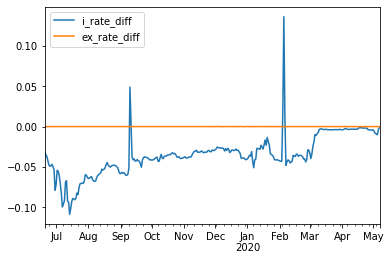

dai_sai       sai       dai  i_rate_diff  ex_rate_diff
2019-11-09   0.9996  0.056812  0.000000     0.056812        0.0004
2019-11-14   1.0000  0.048752  0.013110     0.035642        0.0000
2019-11-15   1.0000  0.049360  0.017555     0.031804        0.0000
2019-11-16   1.0000  0.049860  0.022887     0.026973        0.0000
2019-11-17   1.0000  0.045426  0.021554     0.023873        0.0000
...             ...       ...       ...          ...           ...
2020-05-02   0.9201  0.029241  0.024181     0.005061        0.0716
2020-05-03   0.9917  0.029481  0.007845     0.021636       -0.0692
2020-05-04   0.9225  0.029643  0.007496     0.022147       -0.0244
2020-05-05   0.8981  0.030149  0.006977     0.023172        0.0049
2020-05-06   0.9030  0.030623  0.007140     0.023483       -0.0974

[176 rows x 5 columns]


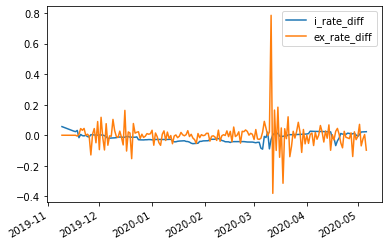

dai_rep       rep       dai  i_rate_diff  ex_rate_diff
2019-11-09  0.08235  0.000241  0.000000     0.000241       0.00760
2019-11-14  0.08995  0.000241  0.013110    -0.012869       0.00303
2019-11-15  0.09298  0.000241  0.017555    -0.017314      -0.00229
2019-11-16  0.09069  0.000220  0.022887    -0.022667      -0.00323
2019-11-17  0.08746  0.000186  0.021554    -0.021368       0.00468
...             ...       ...       ...          ...           ...
2020-05-02  0.08976  0.000386  0.024181    -0.023795       0.00311
2020-05-03  0.09287  0.000387  0.007845    -0.007458       0.00084
2020-05-04  0.09371  0.000384  0.007496    -0.007112      -0.00274
2020-05-05  0.09097  0.000379  0.006977    -0.006598       0.00278
2020-05-06  0.09375  0.000378  0.007140    -0.006761      -0.00425

[176 rows x 5 columns]


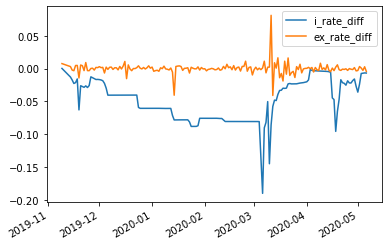

dai_wbtc      wbtc       dai  i_rate_diff  ex_rate_diff
2019-11-09  0.000123  0.009958  0.000000     0.009958      0.000000
2019-11-14  0.000123  0.009943  0.013110    -0.003167      0.000000
2019-11-15  0.000123  0.009799  0.017555    -0.007756     -0.000007
2019-11-16  0.000116  0.010021  0.022887    -0.012866      0.000007
2019-11-17  0.000123  0.010459  0.021554    -0.011095     -0.000002
...              ...       ...       ...          ...           ...
2020-05-02  0.000123  0.001453  0.024181    -0.022727      0.000000
2020-05-03  0.000123  0.001188  0.007845    -0.006657      0.000000
2020-05-04  0.000123  0.001206  0.007496    -0.006290      0.000000
2020-05-05  0.000123  0.001247  0.006977    -0.005729      0.000000
2020-05-06  0.000123  0.008420  0.007140     0.001281     -0.000013

[176 rows x 5 columns]


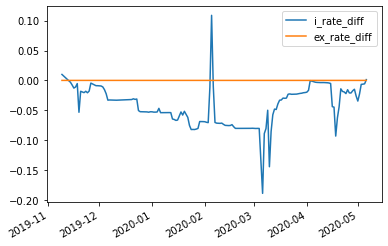

sai_rep       rep       sai  i_rate_diff  ex_rate_diff
2019-04-02  0.05542  0.000000  0.000000     0.000000      -0.00629
2019-04-03  0.04913  0.001731  0.001883    -0.000152      -0.00063
2019-04-10  0.04850  0.001878  0.026418    -0.024539       0.00444
2019-04-11  0.05294  0.002300  0.029952    -0.027652      -0.00386
2019-04-12  0.04908  0.076684  0.032694     0.043990       0.00269
...             ...       ...       ...          ...           ...
2020-05-03  0.00000  0.000387  0.029481    -0.029094       0.00000
2020-05-04  0.00000  0.000384  0.029643    -0.029259       0.00000
2020-05-05  0.00000  0.000379  0.030149    -0.029770       0.00000
2020-05-06  0.00000  0.000378  0.030623    -0.030244       0.00000
2020-05-07  0.00000  0.000379  0.030895    -0.030516       0.00000

[393 rows x 5 columns]


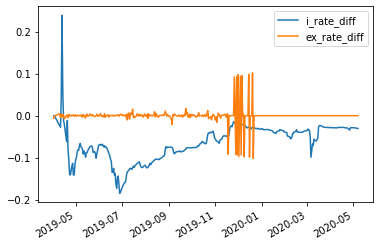

sai_wbtc      wbtc       sai  i_rate_diff  ex_rate_diff
2019-06-20  0.000110  0.004948  0.126218    -0.121270 -1.047000e-05
2019-06-21  0.000099  0.000278  0.141942    -0.141665 -5.950000e-06
2019-06-22  0.000093  0.000362  0.138282    -0.137920 -1.490000e-06
2019-06-23  0.000092  0.000310  0.162660    -0.162350 -1.400000e-07
2019-06-24  0.000092  0.000423  0.173233    -0.172810 -4.270000e-06
...              ...       ...       ...          ...           ...
2020-05-03  0.000123  0.001188  0.029481    -0.028292  0.000000e+00
2020-05-04  0.000123  0.001206  0.029643    -0.028437  0.000000e+00
2020-05-05  0.000123  0.001247  0.030149    -0.028901  0.000000e+00
2020-05-06  0.000123  0.008420  0.030623    -0.022203  0.000000e+00
2020-05-07  0.000123  0.010527  0.030895    -0.020367  0.000000e+00

[323 rows x 5 columns]


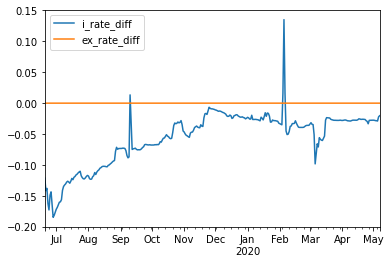

rep_wbtc      wbtc       rep  i_rate_diff  ex_rate_diff
2019-06-20      0.001968  0.004948  0.000762     0.004186      0.000225
2019-06-21      0.002193  0.000278  0.000760    -0.000482     -0.000329
2019-06-22      0.001864  0.000362  0.000554    -0.000192  15227.268136
2019-06-23  15227.270000  0.000310  0.000527    -0.000217   -163.630000
2019-06-24  15063.640000  0.000423  0.000524    -0.000101 -15063.638124
...                  ...       ...       ...          ...           ...
2020-05-03  11072.730000  0.001188  0.000387     0.000802     -9.090000
2020-05-04  11063.640000  0.001206  0.000384     0.000822    118.180000
2020-05-05  11181.820000  0.001247  0.000379     0.000868   -436.370000
2020-05-06  10745.450000  0.008420  0.000378     0.008042 -10745.448774
2020-05-07      0.001226  0.010527  0.000379     0.010149      0.000159

[323 rows x 5 columns]


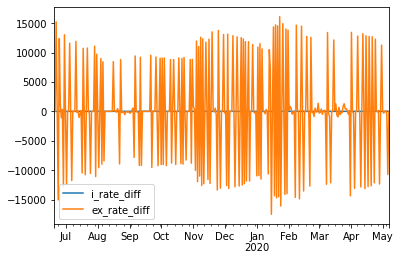

In [31]:
# Return dictionaries for where UIP holds and where it doesn't hold
regression_results = {}
regression_results['pair'] = []
regression_results['n-obs'] = []
regression_results['alpha'] = []
regression_results['beta'] = []
regression_results['r-squared'] = []
regression_results['p-value_alpha'] = []
regression_results['p-value_beta'] = []
regression_results['f-test-p-value'] = []
regression_results['beta-one'] = []

UIP_holds = {}
UIP_not_holds = {}
for market in combinations(tokens, 2):
    quote_token = market[1]
    base_token = market[0]
    try:
        df = utils.make_ex_rate_and_interest_rate_df(quote_token=quote_token, 
                                                    base_token=base_token, 
                                                    rate_type='supply_rates', 
                                                    frequency='D', 
                                                    limit=1000)
        lag_length = int(len(df)**0.25)
    except:
        print('Error making dataframe for ' + str(quote_token) + ' to ' + str(base_token))
        continue
    
    df['i_rate_diff'] = df[quote_token] - df[base_token]
    df['ex_rate_diff'] = df[str(base_token)+ '_' + str(quote_token)].diff().shift(-1)


    df = df.dropna()
    print(df)
    df[['i_rate_diff', 'ex_rate_diff']].plot()
    plt.show()

    model = OLS(endog=df['ex_rate_diff'], exog=sm.add_constant(df['i_rate_diff']))
    res = model.fit(cov_type='HAC', cov_kwds={'maxlags':lag_length})

    regression_results['pair'].append(base_token + '_' + quote_token)
    regression_results['pair'].append(' ')

    regression_results['n-obs'].append(int(res.nobs))
    regression_results['n-obs'].append(' ')
    
    regression_results['alpha'].append("{:.2f}".format(res.params[0]))
    regression_results['alpha'].append('(' + str("{:.2f}".format(res.bse[0])) + ')')

    regression_results['beta'].append(res.params[1])
    regression_results['beta'].append('(' + str("{:.2f}".format(res.bse[1])) + ')')

    regression_results['r-squared'].append("{:.2f}".format(res.rsquared))
    regression_results['r-squared'].append(' ')

    regression_results['p-value_alpha'].append("{:.2f}".format(res.pvalues[0]))
    regression_results['p-value_alpha'].append(' ')

    regression_results['p-value_beta'].append("{:.2f}".format(res.pvalues[1]))
    regression_results['p-value_beta'].append(' ')

    #Test beta=1
    hypotheses = '(i_rate_diff = 1)'
    f_test = res.f_test(hypotheses)

    regression_results['beta-one'].append("{:.2f}".format(f_test.pvalue))
    regression_results['beta-one'].append(' ')

    #Test joint null
    hypotheses = '(const = 0), (i_rate_diff = 1)'
    f_test = res.f_test(hypotheses)

    regression_results['f-test-p-value'].append("{:.2f}".format(f_test.pvalue))
    regression_results['f-test-p-value'].append(' ')

    

    if f_test.pvalue >= 0.05:
        UIP_holds[str(base_token)+ '_' + str(quote_token)] = f_test.pvalue
    else:
        UIP_not_holds[str(base_token)+ '_' + str(quote_token)] = f_test.pvalue
            

In [17]:
df_results = pd.DataFrame(regression_results)
print(df_results.to_latex(index=False))


\begin{tabular}{lllllllll}
\toprule
      pair & n-obs &     alpha &         beta & r-squared & p-value\_alpha & p-value\_beta & f-test-p-value & beta-one \\
\midrule
   eth\_bat &   393 &      4.82 &      -190.15 &      0.00 &          0.13 &         0.26 &           0.28 &     0.26 \\
           &       &    (3.16) &     (169.19) &           &               &              &                &          \\
   eth\_zrx &   390 &      3.39 &     -188.416 &      0.01 &          0.20 &         0.15 &           0.33 &     0.14 \\
           &       &    (2.64) &     (129.56) &           &               &              &                &          \\
  eth\_usdc &   394 &      0.61 &     -6.71869 &      0.00 &          0.71 &         0.74 &           0.93 &     0.70 \\
           &       &    (1.65) &      (20.01) &           &               &              &                &          \\
   eth\_dai &   176 &      1.54 &     -40.2433 &      0.01 &          0.09 &         0.23 &           0.24 &  

In [20]:
#Individual regression explorer
quote_token = 'wbtc'
base_token = 'eth'
df = utils.make_ex_rate_and_interest_rate_df(quote_token=quote_token, 
                                            base_token=base_token, 
                                            rate_type='borrow_rates', 
                                            frequency='D', 
                                            limit=1000)
lag_length = int(len(df)**0.25)
df['i_rate_diff'] = df[quote_token] - df[base_token]
df['ex_rate_diff'] = df[str(base_token)+ '_' + str(quote_token)].diff().shift(-1)
df = df.dropna()
model = OLS(endog=df['ex_rate_diff'], exog=sm.add_constant(df['i_rate_diff']))
res = model.fit(cov_type='HAC', cov_kwds={'maxlags':lag_length})
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ex_rate_diff   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     1.830
Date:                Sat, 06 Jun 2020   Prob (F-statistic):              0.177
Time:                        13:52:10   Log-Likelihood:                 911.06
No. Observations:                 323   AIC:                            -1818.
Df Residuals:                     321   BIC:                            -1811.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0006      0.001     -1.048      0.295      -0.002       0.000
i_rate_diff     0.0187      0.014      1.353      0.176      -0.008       0.046
==============================================================================
Omnibus:                        3.826   Durbin-Watson:                   2.905
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.689
Skew:                          -0.020   Prob(JB):                        0.261
Kurtosis:                       2.555   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
"""

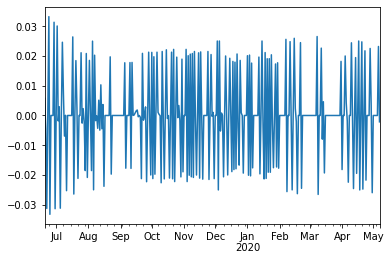

In [23]:
# df['i_rate_diff'].plot()
df['ex_rate_diff'].plot()